<a href="https://colab.research.google.com/github/mendozalf/machinelearning/blob/main/fernando_bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
target = ['casual', 'registered']

In [ ]:
y = bikes[target]
X = bikes.drop(columns = ["casual", "registered", "dteday"])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(128, input_dim=len(X_train[0]), activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='leaky_relu'))

model.add(layers.Dense(1, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,817 (198.50 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 40768.2461 - mse: 40768.2461 - val_loss: 32079.8359 - val_mse: 32079.8359
Epoch 2/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 32155.4727 - mse: 32155.4727 - val_loss: 30763.1973 - val_mse: 30763.1973
Epoch 3/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 30869.2422 - mse: 30869.2422 - val_loss: 30031.2168 - val_mse: 30031.2168
Epoch 4/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 30424.0488 - mse: 30424.0488 - val_loss: 29483.3066 - val_mse: 29483.3066
Epoch 5/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 29957.5195 - mse: 29957.5195 - val_loss: 29071.0547 - val_mse: 29071.0547
Epoch 6/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 29573.2949 - mse: 29573.2949 - val_loss: 28871.6660 - val_mse: 28871.6660
Epoch 7/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 29355.9102 - mse: 29355.9102 - val_loss: 28516.0957 - val_mse: 28516.0957
Epoch 8/2000
2559/2559 ━━━━━━

**Exploratory Visual**

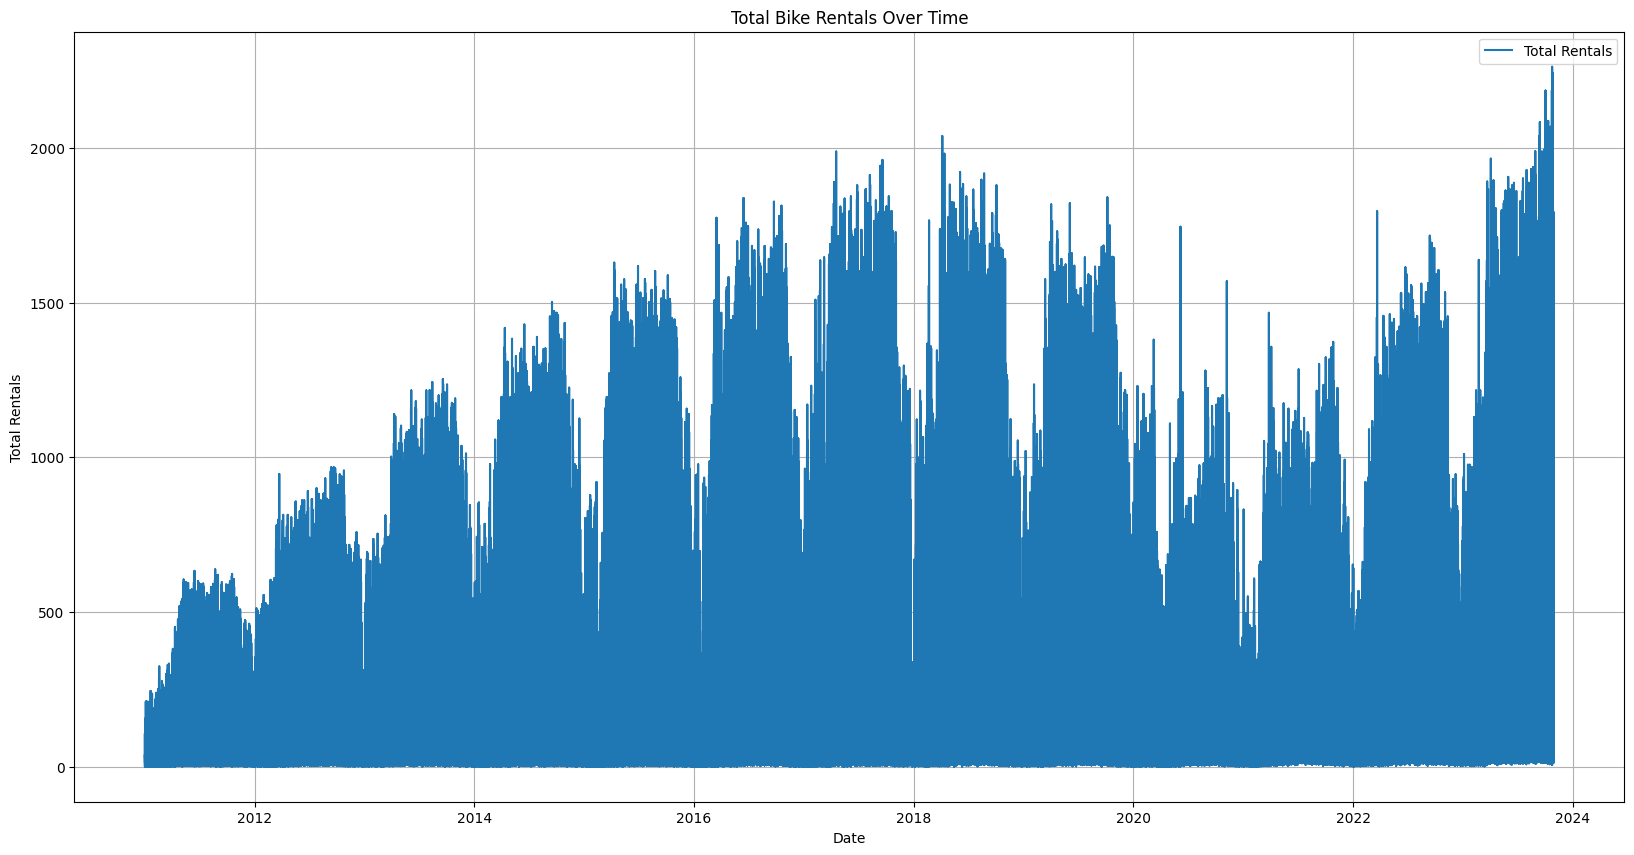

In [ ]:
# Create a new column for total rentals
bikes['total_rentals'] = bikes['casual'] + bikes['registered']

# Convert date column to datetime
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

# 1. Time Series Analysis: Total Rentals Over Time
plt.figure(figsize=(20, 10))
plt.plot(bikes['dteday'], bikes['total_rentals'], label='Total Rentals')
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# Create a new column for total rentals
bikes['total_rentals'] = bikes['casual'] + bikes['registered']

# Convert date column to datetime
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

# Aggregate total rentals by month
bikes['month'] = bikes['dteday'].dt.to_period('M')
monthly_rentals = bikes.groupby('month')['total_rentals'].sum().reset_index()



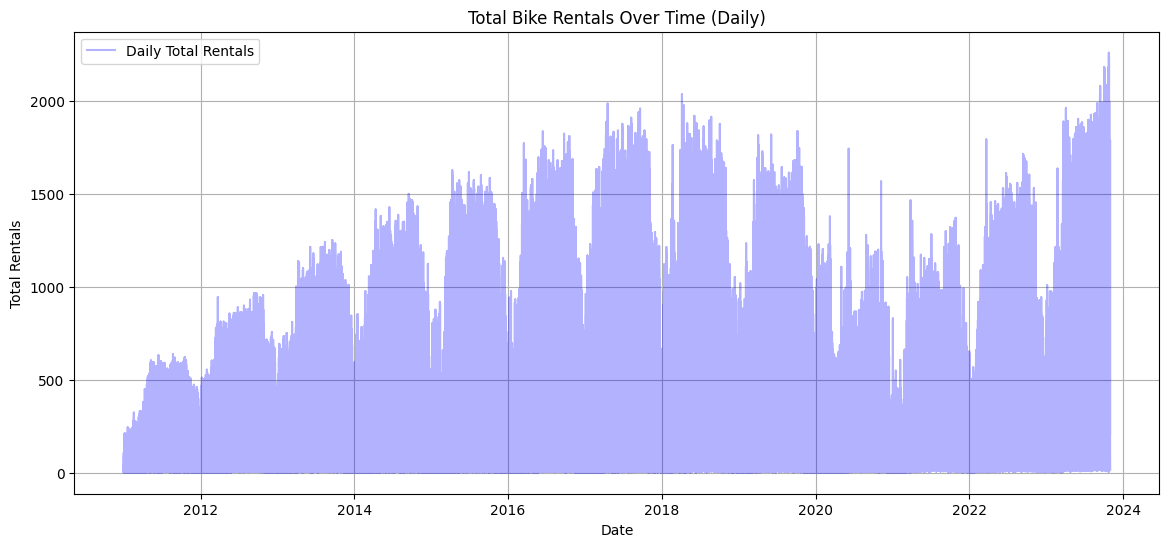

In [ ]:
# 1. Time Series Analysis: Total Rentals Over Time (Daily)
plt.figure(figsize=(14, 6))
plt.plot(bikes['dteday'], bikes['total_rentals'], label='Daily Total Rentals', color='blue', alpha=0.3)
plt.title('Total Bike Rentals Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.legend()
plt.grid(True)
plt.show()

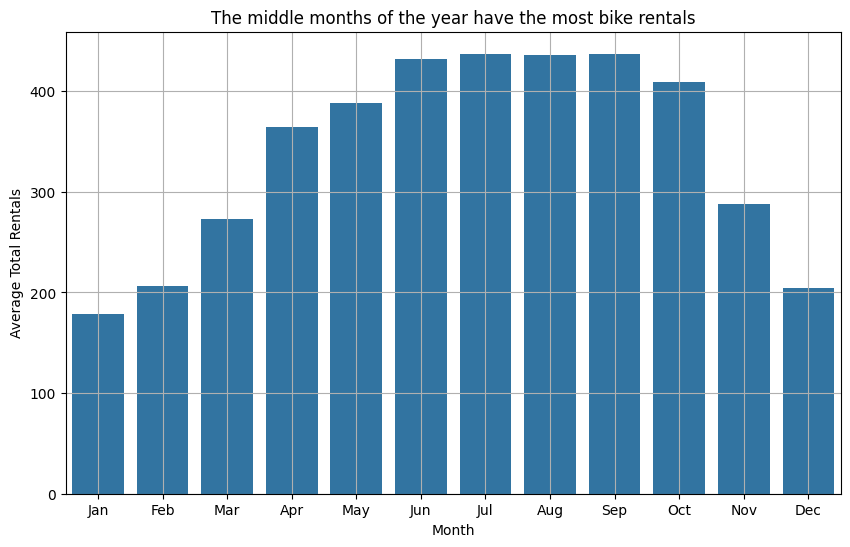

In [ ]:
# Assuming 'bikes' DataFrame is already loaded
bikes['dteday'] = pd.to_datetime(bikes['dteday'])  # Convert 'dteday' to datetime
bikes['month'] = bikes['dteday'].dt.month  # Extract the month
bikes['total_rentals'] = bikes['casual'] + bikes['registered'] # Calculate total rentals

# Calculate average rentals for each month across all years
monthly_avg = bikes.groupby('month')['total_rentals'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_rentals', data=monthly_avg)
plt.title('The middle months of the year have the most bike rentals')
plt.xlabel('Month')
plt.ylabel('Average Total Rentals')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

<ipython-input-7-24e36061c58b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_2019_2020['month'] = bikes_2019_2020['dteday'].dt.to_period('M')


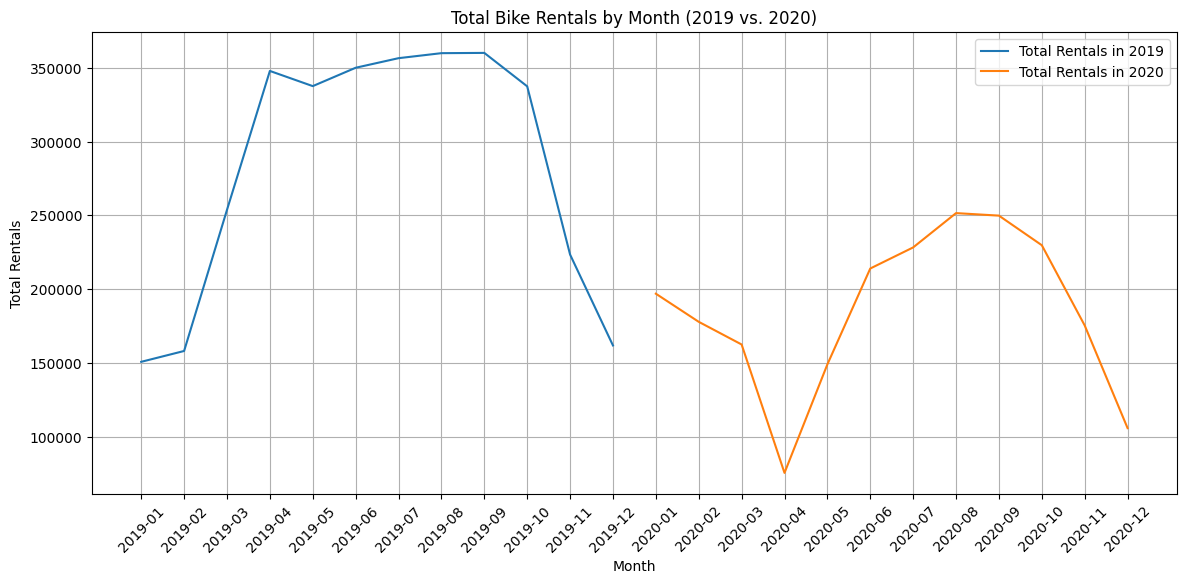

In [ ]:
# Filter the data for 2019 and 2020
bikes['year'] = bikes['dteday'].dt.year
bikes_2019_2020 = bikes[(bikes['year'] == 2019) | (bikes['year'] == 2020)]

# Aggregate total rentals by month for 2019 and 2020
bikes_2019_2020['month'] = bikes_2019_2020['dteday'].dt.to_period('M')
monthly_rentals = bikes_2019_2020.groupby(['year', 'month'])['total_rentals'].sum().reset_index()

# Plot the monthly trend for 2019 and 2020
plt.figure(figsize=(14, 6))
for year in [2019, 2020]:
    subset = monthly_rentals[monthly_rentals['year'] == year]
    plt.plot(subset['month'].astype(str), subset['total_rentals'], label=f'Total Rentals in {year}')

plt.title('Total Bike Rentals by Month (2019 vs. 2020)')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-8-c5dda7e625ed>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=bikes, x='hr', y='total_rentals', estimator='mean', ci=None, color='green')


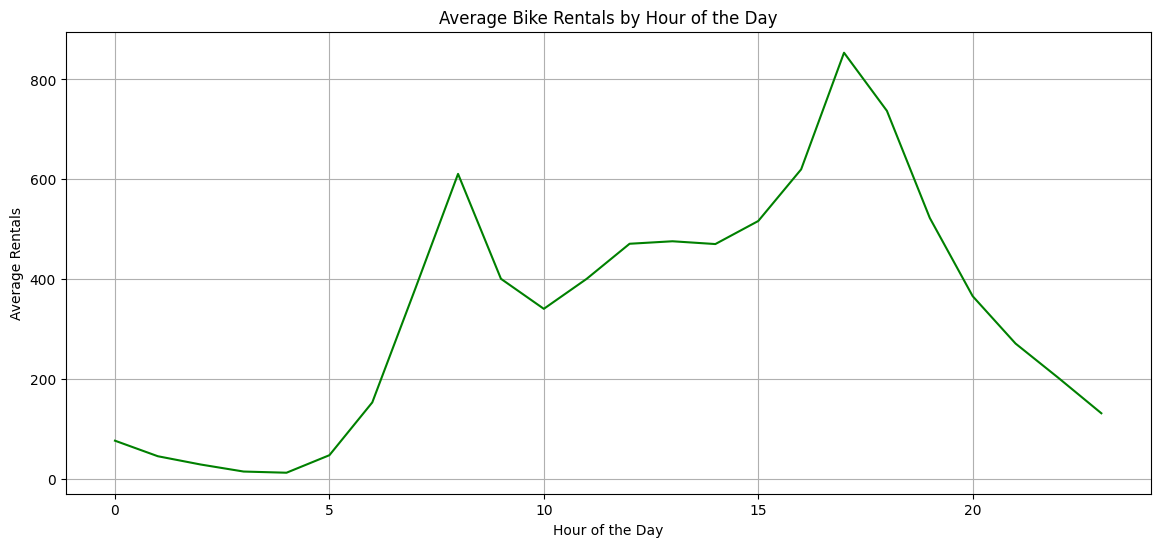

In [ ]:
# 2. Hourly Rental Patterns
plt.figure(figsize=(14, 6))
sns.lineplot(data=bikes, x='hr', y='total_rentals', estimator='mean', ci=None, color='green')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.show()

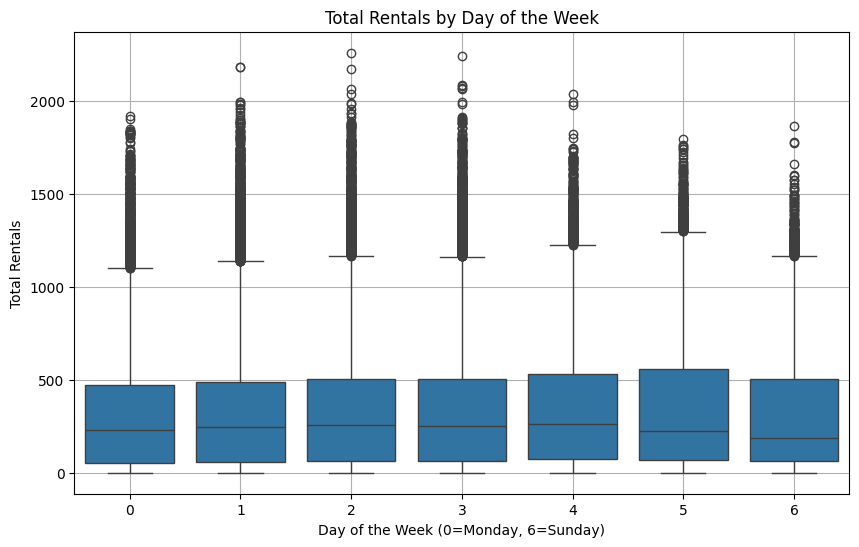

In [ ]:
# 3. Rentals by Day of the Week
bikes['day_of_week'] = bikes['dteday'].dt.dayofweek
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='total_rentals', data=bikes)
plt.title('Total Rentals by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

<ipython-input-5-af26221a198e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-5-af26221a198e>:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


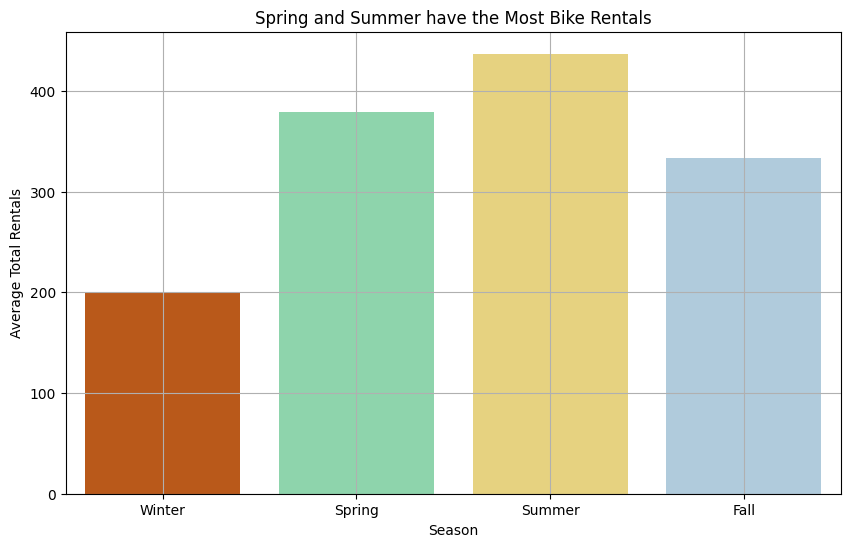

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define colors for each season
season_colors = {
    "Winter": '#A9CCE3',  # Winter - Icy Blue
    "Spring": '#82E0AA',  # Spring - Fresh Green
    "Summer": '#F7DC6F',  # Summer - Bright Yellow
    "Fall": '#D35400'   # Fall - Warm Orange
}


# Load the data (assuming 'bikes' DataFrame is already loaded)
# bikes = pd.read_csv('your_data_file.csv')  # If not loaded, uncomment and load here
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes['total_rentals'] = bikes['casual'] + bikes['registered']

# Map season numbers to season names
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}
bikes['season_name'] = bikes['season'].map(season_mapping)


# Calculate average rentals by season
avg_rentals_by_season = bikes.groupby('season_name')['total_rentals'].mean().reset_index()

# Assign colors to the seasons
avg_rentals_by_season['color'] = avg_rentals_by_season['season_name'].map(season_colors)

# Create the bar plot with the assigned colors and specified order
plt.figure(figsize=(10, 6))
sns.barplot(
    x='season_name',
    y='total_rentals',
    data=avg_rentals_by_season,
    palette=avg_rentals_by_season['color'].values,
    order=['Winter', 'Spring', 'Summer', 'Fall']  # Specify the desired order here
)
plt.title('Spring and Summer have the Most Bike Rentals')
plt.xlabel('Season')
plt.ylabel('Average Total Rentals')
plt.grid(True)
plt.show()

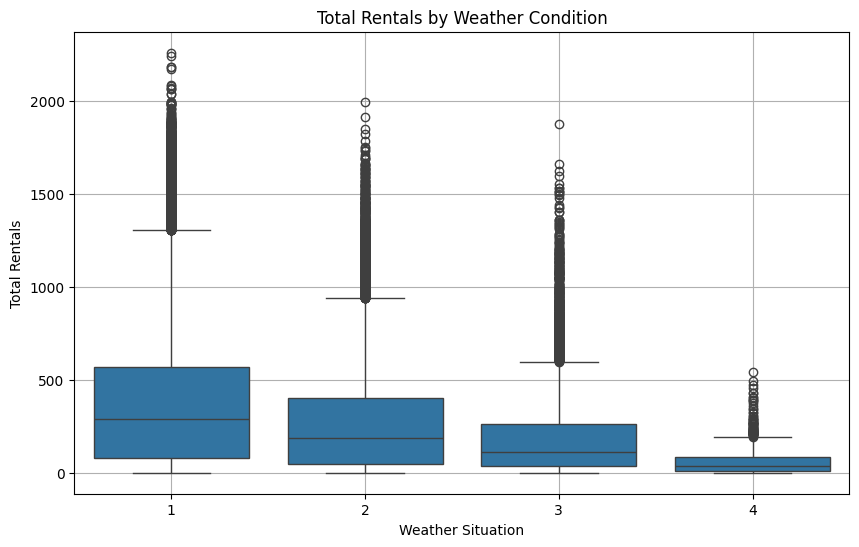

In [ ]:
# 5. Rentals by Weather Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='total_rentals', data=bikes)
plt.title('Total Rentals by Weather Condition')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

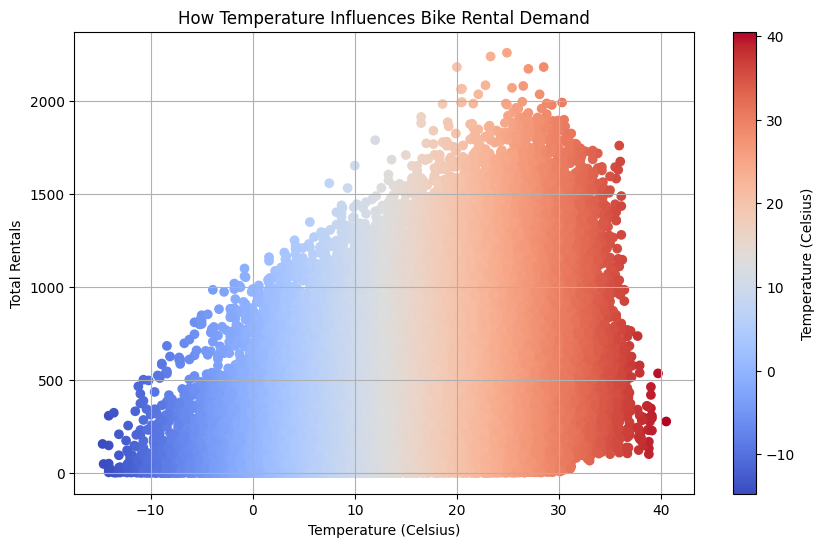

In [ ]:
plt.figure(figsize=(10, 6))

# Plot using Matplotlib's scatter, which handles color mapping better
scatter = plt.scatter(
    x=bikes['temp_c'],
    y=bikes['total_rentals'],
    c=bikes['temp_c'],
    cmap='coolwarm'
)

# Add color bar for temperature scale
plt.colorbar(scatter, label='Temperature (Celsius)')

plt.title('How Temperature Influences Bike Rental Demand')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

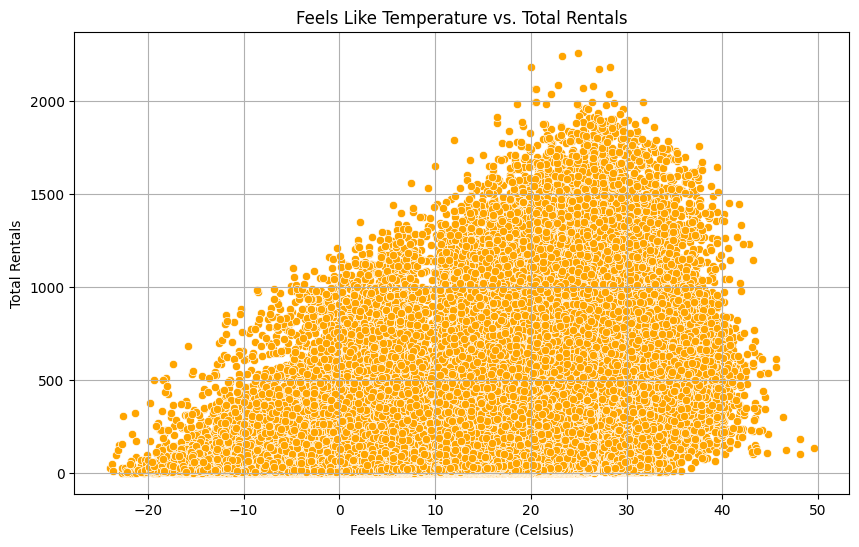

In [ ]:
# 7. Feels Like Temperature vs. Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='feels_like_c', y='total_rentals', data=bikes, color='orange')
plt.title('Feels Like Temperature vs. Total Rentals')
plt.xlabel('Feels Like Temperature (Celsius)')
plt.ylabel('Total Rentals')
plt.grid(True)
plt.show()

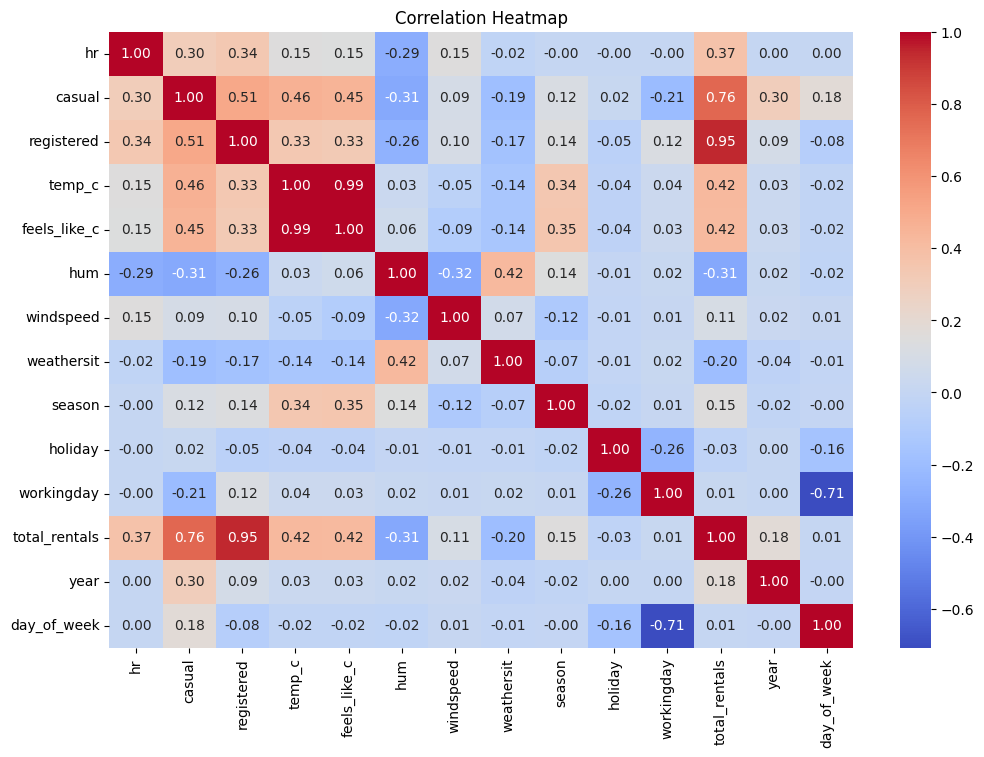

In [ ]:
# 8. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns before calculating correlation
numeric_bikes = bikes.select_dtypes(include=np.number)
corr = numeric_bikes.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

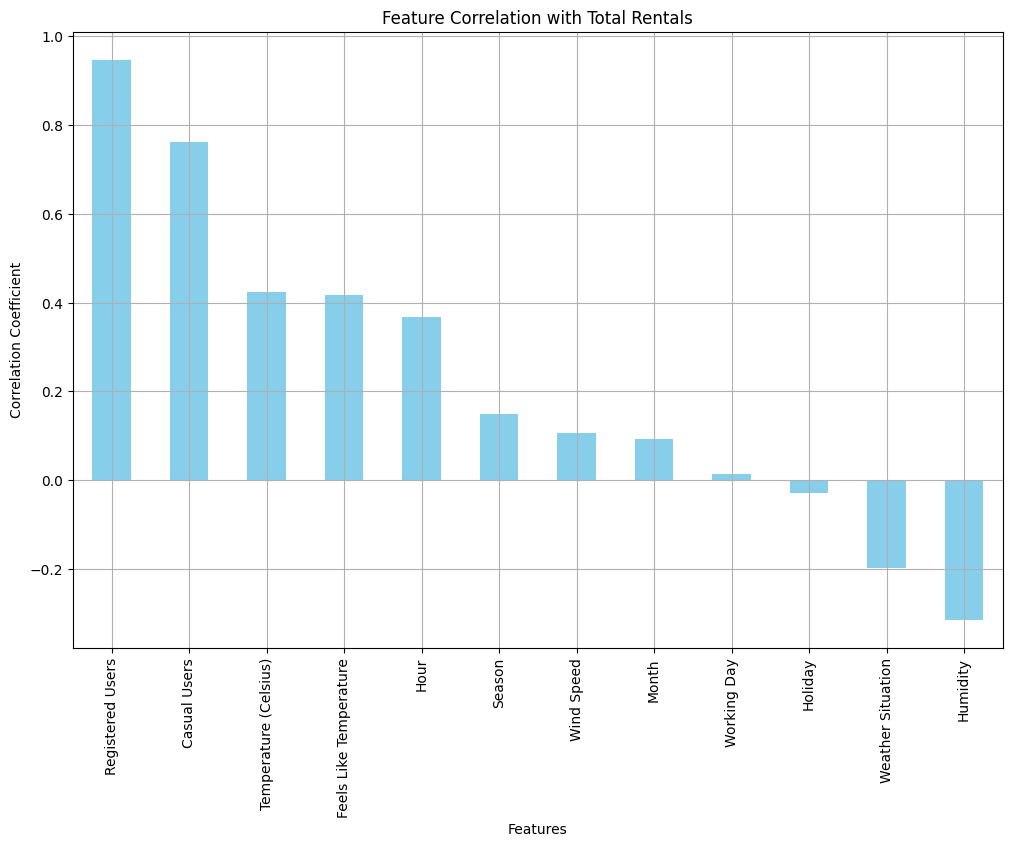

In [ ]:
# Calculate the correlation matrix
# Exclude non-numeric and datetime columns
numeric_bikes = bikes.select_dtypes(include=np.number)
correlation_matrix = numeric_bikes.corr()

# Get correlation values for 'total_rentals' and sort them
corr_target = correlation_matrix['total_rentals'].sort_values(ascending=False)

# Define a dictionary to map old labels to new labels
label_mapping = {
    'hum': 'Humidity',
    'temp_c': 'Temperature (Celsius)',
    'weathersit': 'Weather Situation',
    'windspeed': 'Wind Speed',
    'season': 'Season',
    'mnth': 'Month',
    'hr': 'Hour',
    'holiday': 'Holiday',
    'workingday': 'Working Day',
    'yr': 'Year',
    'weekday': 'Weekday',
    'feels_like_c': 'Feels Like Temperature',
    'month': 'Month',
    'registered': 'Registered Users',
    'casual': 'Casual Users',
}

# Apply the mapping to the index of corr_target
corr_target = corr_target.rename(index=label_mapping)


# Plot the updated chart
plt.figure(figsize=(12, 8))
corr_target.drop('total_rentals').plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Total Rentals')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [ ]:
# Combine casual and registered users into total rentals
bikes['total_rentals'] = bikes['casual'] + bikes['registered']

# Drop unnecessary columns
X = bikes.drop(columns=['casual', 'registered', 'dteday', 'total_rentals'])
y = bikes['total_rentals']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='relu')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Early stopping to avoid overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=2000,
    validation_split=0.35,
    batch_size=20,
    callbacks=[early_stop],
    shuffle=False
)

# Model summary
model.summary()

Epoch 1/2000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2559/2559 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 96619.6562 - mae: 223.5194 - mse: 96619.6562 - val_loss: 57313.8633 - val_mae: 157.5970 - val_mse: 57313.8633
Epoch 2/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 59326.2461 - mae: 163.2540 - mse: 59326.2461 - val_loss: 51051.0781 - val_mae: 143.2237 - val_mse: 51051.0781
Epoch 3/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 53814.3594 - mae: 153.0286 - mse: 53814.3594 - val_loss: 48453.4141 - val_mae: 138.4750 - val_mse: 48453.4141
Epoch 4/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 51765.9961 - mae: 148.7538 - mse: 51765.9961 - val_loss: 46844.3984 - val_mae: 136.3002 - val_mse: 46844.3984
Epoch 5/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 50073.6367 - mae: 146.5377 - mse: 50073.6367 - val_loss: 44941.1758 - val_mae: 133.2324 - val_mse: 44941.1758
Epoch 6/2000
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 48589.1797 - mae: 143.9223 - mse: 48589.1797 - val_loss: 42308.3633 - val_ma

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,453 (595.52 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,636 (397.02 KB)

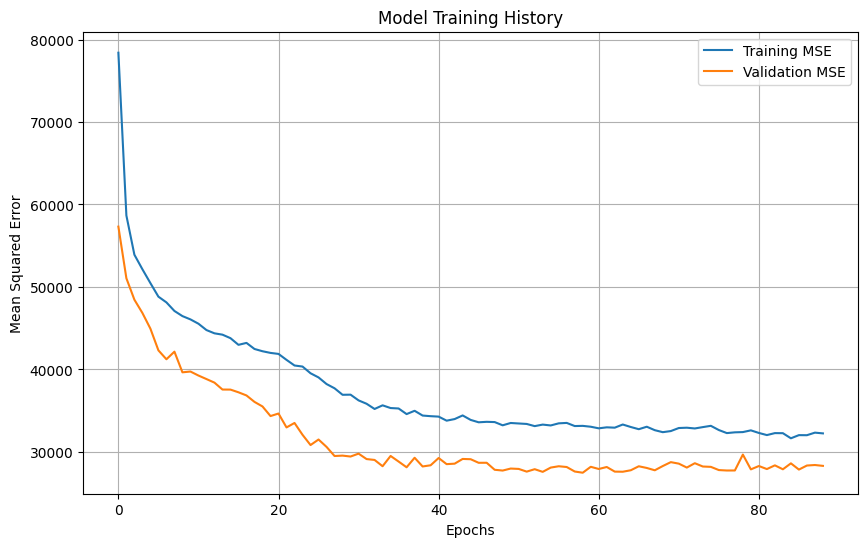

In [ ]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Model Training History')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_mse:.2f}')
print(f'Test MAE: {test_mae:.2f}')

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27903.8945 - mae: 109.6388 - mse: 27903.8945
Test MSE: 28047.86
Test MAE: 110.09
